In [52]:
import matplotlib.pyplot as plt
import numpy as np
import json

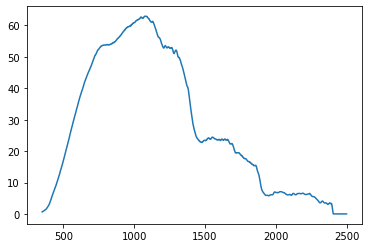

In [40]:
PATH = 'c:/work/Thomson Scattering/T-15/Spectral_cal/'

P = {'l': [], 'data': []}
with open(PATH + 'Lamp_p.txt', 'r') as file1:
    for line in file1:
        P['l'].append(float(line.split()[0]) * 1000)
        P['data'].append(float(line.split()[1]))

plt.plot(P['l'], P['data'])

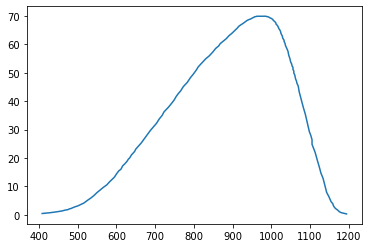

In [5]:
LFD = {'l': [], 'data': []}

with open(PATH + 'hamamatsu.txt', 'r') as file2:
    for line in file2:
        data = line.split()
        LFD['l'].append(float(data[0]))
        LFD['data'].append(float(data[1]))

plt.plot(LFD['l'], LFD['data'])

(900.0, 1100.0)

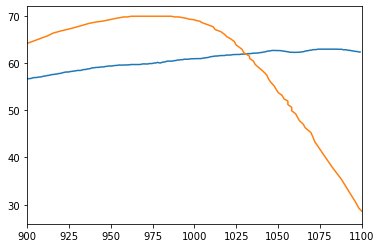

In [10]:
plt.plot(P['l'][550:750], P['data'][550:750])
plt.plot(LFD['l'][64:140], LFD['data'][64:140])
plt.xlim(900, 1100)

(900.0, 1100.0)

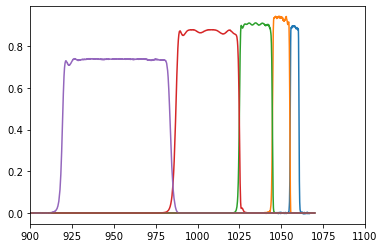

In [11]:
K = {'l': []}
for ch in range(1, 7):
    K[ch] = []
with open(PATH + 'optical_#34.txt') as file3:
    for line in file3:
        data = line.split()
        K['l'].append(float(data[0]))
        for ch in range(1, 7):
            K[ch].append(float(data[ch]))

for ch in range(1, 7):
    plt.plot(K['l'], K[ch])
plt.xlim(900, 1100)

In [33]:
def linear_approx(dict, l_new):
    data_new = []
    l_test = []
    for l in l_new:
        for i, l_old in enumerate(dict['l']):
            if dict['l'][i] <= l < dict['l'][i+1]:
                l_test.append(l)
                x1 = dict['l'][i]
                x2 = dict['l'][i+1]
                y1 = dict['data'][i]
                y2 = dict['data'][i+1]
                data_new.append(y1 + (y2 - y1) * (l - x1) / (x2 - x1))
    return data_new

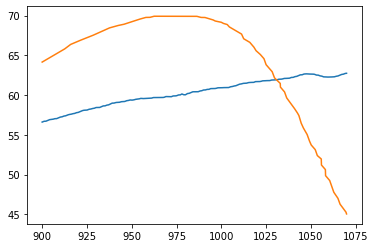

In [34]:
P_l = linear_approx(P, K['l'])
R_l = linear_approx(LFD, K['l'])

plt.plot(K['l'], P_l)
plt.plot(K['l'], R_l)

In [35]:
S = 1.55*1e-3*5.4*1e-3
Om = 0.16
Rsv = 10000
G_slow = 40

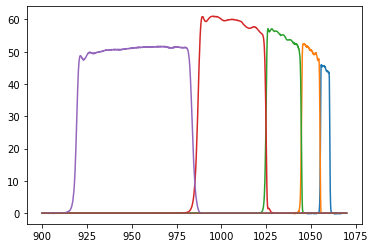

In [37]:
for ch in range(1, 7):
    plt.plot(K['l'], [K[ch][i] * R_l[i] for i in range(len(K['l']))])

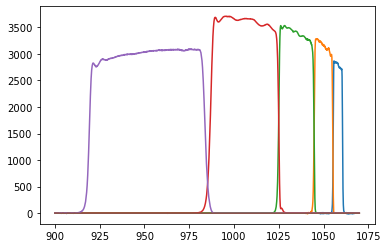

In [38]:
for ch in range(1, 7):
    plt.plot(K['l'], [K[ch][i] * R_l[i] * P_l[i] for i in range(len(K['l']))])


In [42]:
I = []
for ch in range(1, 7):
    I.append(np.trapz([K[ch][i] * R_l[i] * P_l[i] * 1000 * S * Om for i in range(len(K['l']))], [i * 1e-9 for i in K['l']]))
print(I)

[1.9880487739660728e-08, 4.414714454877364e-08, 8.983012557422462e-08, 1.8549221901389037e-07, 2.6196916071214563e-07, 0.0]


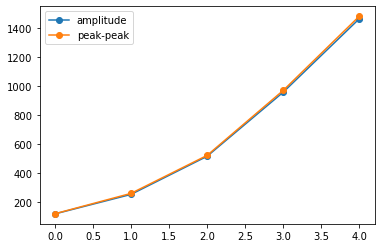

In [45]:
U_amp = [116.62, 251.4,	514.81,	957.35,	1465]
U_pp = [117.83, 258.5, 520.9, 969.78, 1482.4]
plt.plot(U_amp, 'o-', label='amplitude')
plt.plot(U_pp, 'o-', label='peak-peak')
plt.legend()

[29.634584810747416, 29.277091717042982, 28.993614150610977, 26.14071914055271, 28.293406673712948]


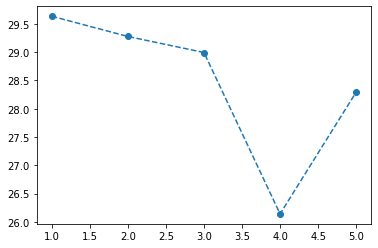

In [50]:
alpha = []

for ch in range(5):
    alpha.append(U_pp[ch] * 1e-3 / (Rsv * G_slow * 0.5 * I[ch]))

print(alpha)
plt.plot([i for i in range(1,6)], alpha, 'o--')

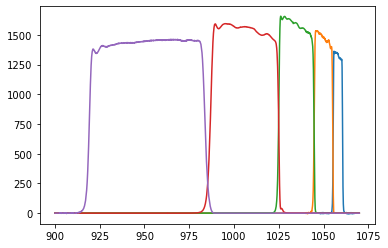

In [49]:
for ch in range(1, 6):
    plt.plot(K['l'], [K[ch][i] * R_l[i] * alpha[ch-1] for i in range(len(K['l']))])

In [54]:
al_dict = {}

K_new = {'l': K['l']}

for ch in range(1,6):
    K_new[ch] = [K[ch][i] * R_l[i] * alpha[ch-1] for i in range(len(K['l']))]

for ch in range(5):
    al_dict[ch+1] = alpha[ch]

with open(PATH + '22.03.30_sp_cal_coef.json', 'w') as file4:
    json.dump(al_dict, file4)

with open(PATH + '22.03.30_sp_cal.json', 'w') as file5:
    json.dump(K_new, file5)